# COGS 108 - EDA Checkpoint

# Names

- Juna Kim
- Wilson Low
- Ricardo Sedano
- Kayla Luong

<a id='research_question'></a>
# Research Question

How might different transportation methods, as measured by the length of commuting time per method, impact college academic achievement across different U.S. cities, as measured by GPA?

# Dataset(s)

**Dataset 1: Higher Education Student Performance Evaluation**
- Link to the dataset: https://www.kaggle.com/datasets/csafrit2/higher-education-students-performance-evaluation
- Number of observations: 145
This dataset provides both demographic and academic details on 145 college students from the Faculty of Engineering and Faculty of Educational Sciences in 2019, including their mode of transportation to the university, their accommodation type, attendance to class, and cumulative grade point average in the last semester. 

**Dataset 2: Student Behavior**
- Link to the dataset: https://www.kaggle.com/datasets/gunapro/student-behavior
- Number of observations: 235
This dataset contains survey results from university students in India and provides details on student grades on a 0-100 scale, as well as other demographic and extracurricular information. Most relevantly, it provides traveling time in 30 minute buckets (i.e. 0 - 30 min., 30 - 60 min., … , >3 hours). 

**Dataset 3: Student Performance Data Set**
- Link to the dataset: https://www.kaggle.com/datasets/larsen0966/student-performance-data-set 
- Number of observations: 649
This dataset contains academic details on secondary school students in two Portuguese schools, and provides data on student grades for math and Portuguese language, as well as other demographic and extracurricular information. Most relevantly, it provides home-to-school travel time in buckets of 0 - 15 min., 15 - 30 min., 30 min. - 1 hour, and >1 hour.

**Dataset 4: NY Bus Breakdown and Delays - Kayla**
- Link to the dataset: https://data.cityofnewyork.us/Education/School-Bus-Delays-Report-October_2021_1173B_21-994/c6ph-pcpz
- Number of observations: 28k rows, 10 columns
This dataset provides details on the number of New York school bus breakdowns in 2021. Information was reported by the school bus companies, and contains information for source of breakdown, time delay in intervals of 15 minutes (i.e. 0-15 min., 15 - 30 min., 30 - 45 min., 45 - 60 min., 60 - 75 min., 75 - 90 min., >90 min.) and whether the school reported an arrival after session time.


Given the significant differences between our datasets in terms of geographic location, grading scale, and transportation availability, we will maintain separate datasets and run individual analyses on each, combining the results later for our conclusion.

# Setup

In [ ]:
# Imports 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# set plotting size parameter
plt.rcParams['figure.figsize'] = (15, 4)
import math
import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 104)
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest


In [ ]:
# Read in our CSV files
universityEval = pd.read_csv('student_prediction.csv')
secondaryEval = pd.read_csv('student-por.csv')
studentBehavior = pd.read_csv('Student_Behavior.csv')
NYBus = pd.read_csv('School_Bus_Delays.csv')

# Data Cleaning

**Dataset #1**

First, let's take a look at our universityEval dataset.

In [ ]:
universityEval

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,LIVING,MOTHER_EDU,FATHER_EDU,#_SIBLINGS,KIDS,MOTHER_JOB,FATHER_JOB,STUDY_HRS,READ_FREQ,READ_FREQ_SCI,ATTEND_DEPT,IMPACT,ATTEND,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,1,1,2,3,1,2,5,3,2,2,1,1,1,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,1,2,3,2,1,2,1,2,2,2,1,1,1,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,2,2,2,2,1,2,1,2,1,2,1,1,1,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,2,1,2,5,1,2,1,3,1,2,1,1,1,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,4,3,3,2,1,2,4,2,1,1,1,1,1,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,2,1,2,2,2,2,4,3,3,2,1,1,1,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,2,1,1,5,1,2,1,3,2,2,2,1,2,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,1,3,4,4,1,2,4,2,2,2,1,1,1,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,3,4,4,1,1,3,3,2,2,1,1,1,1,2,1,2,1,2,1,5,3,9,4


For Dataset #1, we only want to extract the student's mode of transport, accommodation type, how often the student attends class, and their cumulative grade point average in the last semester.

In [ ]:
# Extract only the relevant columns for analysis
# In this case:
#    - TRANSPORT refers to the student's transportation to the university, formatted as
#         1: Bus, 2: Private car/taxi, 3: bicycle, 4: Other
#    - LIVING refers to the student's accommodation type, formatted as 
#         1: rental, 2: dormitory, 3: with family, 4: Other
#    - ATTEND refers to the student's attendance to classes, formatted as 
#         1: always, 2: sometimes, 3: never
#    - CUML_GPA refers to the student's cumulative grade point average in the last semester (on a 4.00 scale), formatted as 
#         1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49

universityEval = universityEval[['AGE','TRANSPORT','LIVING','ATTEND', 'CUML_GPA']]
universityEval

,AGE,TRANSPORT,LIVING,ATTEND,CUML_GPA
0,2,1,1,1,1
1,2,1,1,1,2
2,2,4,2,1,2
3,1,1,2,1,3
4,2,1,4,1,2
...,...,...,...,...,...
140,2,1,2,1,3
141,1,4,2,2,5
142,1,1,1,1,4
143,2,2,3,1,5


Next, we want to check if there are any missing or invalid values and drop any rows as necessary.

In [ ]:
# Check for any missing values and drop rows as necessary
# For this dataset, we will check whether there are any null values.
universityEval.isnull().sum(axis = 'rows')

AGE          0
TRANSPORT    0
LIVING       0
ATTEND       0
CUML_GPA     0
dtype: int64

In [ ]:
# Check for any invalid values and drop rows as necessary
# For this dataset, TRANSPORT and LIVING must be within [1,4], ATTEND must be within [1,3], and CUML_GPA must be within [1,5]
print(universityEval[(universityEval['TRANSPORT'] > 4) | (universityEval['TRANSPORT'] < 1)].shape)
print(universityEval[(universityEval['LIVING'] > 4) | (universityEval['LIVING'] < 1)].shape)
print(universityEval[(universityEval['ATTEND'] > 3) | (universityEval['ATTEND'] < 1)].shape)
print(universityEval[(universityEval['CUML_GPA'] > 5) | (universityEval['LIVING'] < 1)].shape)


(0, 5)
(0, 5)
(0, 5)
(0, 5)


It looks like there are no null values in the universityEval dataset.

The numbers that represent the student data are not super intuitive, so we will replace them with the actual responses for each category. We'll start off with the transportation type column.

In [ ]:
# Change the numerical data into qualitative data
def standardize_transport(num_in):

    num_in = str(num_in)
    
    if num_in == '1':    
        num_in = num_in.replace('1', 'Bus')
    if num_in == '2':  
        num_in = num_in.replace('2', 'Private car/taxi')
    if num_in == '3':  
        num_in = num_in.replace('3', 'Bicycle')
    if num_in == '4':  
        num_in = num_in.replace('4', 'Other')
    
    return num_in

# Keep a copy of the universityEval dataset that maintains the original column names to calculate averages and other statistics later
origuniversityEval = universityEval.copy()

# Apply the function to the age column in the universityEval dataset
universityEval['TRANSPORT'] = universityEval['TRANSPORT'].apply(standardize_transport)

# Check the dataset to see if the standardization was properly executed
universityEval

,AGE,TRANSPORT,LIVING,ATTEND,CUML_GPA
0,2,Bus,1,1,1
1,2,Bus,1,1,2
2,2,Other,2,1,2
3,1,Bus,2,1,3
4,2,Bus,4,1,2
...,...,...,...,...,...
140,2,Bus,2,1,3
141,1,Other,2,2,5
142,1,Bus,1,1,4
143,2,Private car/taxi,3,1,5


Next, we'll tackle the accommodation type column.

In [ ]:
# Change the numerical data into qualitative data
def standardize_living(num_in):

    num_in = str(num_in)
    
    if num_in == '1':    
        num_in = num_in.replace('1', 'Rental')
    if num_in == '2':  
        num_in = num_in.replace('2', 'Dormitory')
    if num_in == '3':  
        num_in = num_in.replace('3', 'With family')
    if num_in == '4':  
        num_in = num_in.replace('4', 'Other')
    
    return num_in

# Apply the function to the living column in the universityEval dataset
universityEval['LIVING'] = universityEval['LIVING'].apply(standardize_living)

# Check the dataset to see if the standardization was properly executed
universityEval

,AGE,TRANSPORT,LIVING,ATTEND,CUML_GPA
0,2,Bus,Rental,1,1
1,2,Bus,Rental,1,2
2,2,Other,Dormitory,1,2
3,1,Bus,Dormitory,1,3
4,2,Bus,Other,1,2
...,...,...,...,...,...
140,2,Bus,Dormitory,1,3
141,1,Other,Dormitory,2,5
142,1,Bus,Rental,1,4
143,2,Private car/taxi,With family,1,5


Now, we'll standardize the class attendance data.

In [ ]:
# Change the numerical data into qualitative data
def standardize_attend(num_in):

    num_in = str(num_in)
    
    if num_in == '1':    
        num_in = num_in.replace('1', 'Always')
    if num_in == '2':  
        num_in = num_in.replace('2', 'Sometimes')
    if num_in == '3':  
        num_in = num_in.replace('3', 'Never')
    
    return num_in

# Apply the function to the attendance column in the universityEval dataset
universityEval['ATTEND'] = universityEval['ATTEND'].apply(standardize_attend)

# Check the dataset to see if the standardization was properly executed
universityEval

,AGE,TRANSPORT,LIVING,ATTEND,CUML_GPA
0,2,Bus,Rental,Always,1
1,2,Bus,Rental,Always,2
2,2,Other,Dormitory,Always,2
3,1,Bus,Dormitory,Always,3
4,2,Bus,Other,Always,2
...,...,...,...,...,...
140,2,Bus,Dormitory,Always,3
141,1,Other,Dormitory,Sometimes,5
142,1,Bus,Rental,Always,4
143,2,Private car/taxi,With family,Always,5


Finally, we'll standardize the student cumulative GPA data.

In [ ]:
# Change the numerical data into qualitative data
def standardize_gpa(num_in):

    num_in = str(num_in)
    
    if num_in == '1':    
        num_in = num_in.replace('1', '<2.00')
    if num_in == '2':  
        num_in = num_in.replace('2', '2.00-2.49')
    if num_in == '3':  
        num_in = num_in.replace('3', '2.50-2.99')
    if num_in == '4':  
        num_in = num_in.replace('4', '3.00-3.49')
    if num_in == '5':  
        num_in = num_in.replace('5', '>3.49')
    
    return num_in

# Apply the function to the cumulative GPA column in the universityEval dataset
universityEval['CUML_GPA'] = universityEval['CUML_GPA'].apply(standardize_gpa)

# Check the dataset to see if the standardization was properly executed
universityEval

,AGE,TRANSPORT,LIVING,ATTEND,CUML_GPA
0,2,Bus,Rental,Always,<2.00
1,2,Bus,Rental,Always,2.00-2.49
2,2,Other,Dormitory,Always,2.00-2.49
3,1,Bus,Dormitory,Always,2.50-2.99
4,2,Bus,Other,Always,2.00-2.49
...,...,...,...,...,...
140,2,Bus,Dormitory,Always,2.50-2.99
141,1,Other,Dormitory,Sometimes,>3.49
142,1,Bus,Rental,Always,3.00-3.49
143,2,Private car/taxi,With family,Always,>3.49


The dataset, universityEval, now displays more descriptive data rather than using numbers to signify particular answer choices. At a glance, it is much easier to understand without a separate legend or key to refer to the answer choices. 

**Dataset #2**


Next, let's take a look at our studentBehavior dataset.

In [ ]:
studentBehavior

,Certification Course,Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,hobbies,daily studing time,prefer to study in,salary expectation,Do you like your degree?,willingness to pursue a career based on their degree,social medai & video,Travelling Time,Stress Level,Financial Status,part-time job
0,No,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Yes,Male,B.com ISM,170.0,76.0,72.0,67.0,65.0,Video Games,30 - 60 minute,Morning,7000,Yes,50%,More than 2 hour,30 - 60 minutes,Bad,Bad,No
231,Yes,Male,B.com ISM,172.0,52.0,72.0,70.0,76.0,Cinema,2 - 3 hour,Anytime,25000,Yes,75%,30 - 60 Minute,30 - 60 minutes,Good,good,No
232,Yes,Female,BCA,139.0,33.0,90.0,75.0,70.0,Cinema,30 - 60 minute,Night,20000,Yes,50%,30 - 60 Minute,2.30 - 3 hour,Bad,good,No
233,Yes,Female,Commerce,153.0,58.0,85.0,74.0,75.0,Cinema,0 - 30 minute,Anytime,20000,Yes,75%,More than 2 hour,2.30 - 3 hour,Awful,good,No


Let's cut down and correct the dataset by removing irrelevant colums from the dataset, as well as setting correct punctuation for easier reading of the data. 

In [ ]:
# Extract only the relevant columns for analysis
# In this case:
#    - 'college mark' refers to the student's college grades on a 0-100 scale.
#    - 'daily studing time' refers to the student's approximate average time spent studying in a day,
#              formatted as: 1 - 30 minute, 30 - 60 min, 1 - 2 Hour, 2 - 3 hour, 3 - 4 hour, More than 4 hour
#    - 'Do you like your degree?' refers to whether or not a student likes their degree,
#              formatted as: Yes, No
#    - 'Travelling Time' refers to the student's approximate average time travelling/commuting in a day,
#              formatted as: 0 - 30 minutes, 30 - 60 minutes, 1 - 1.30 hour, 1.30 - 2 hour, 2 - 2.30 hour, more than 3 hour
#    - 'Stress Level' refers to the student's self-proclaimed stress level,
#              formatted as: Good, Bad, Awful, fabulous

studentBehavior = studentBehavior[['college mark','daily studing time','Do you like your degree?','Travelling Time ','Stress Level ']]

In [ ]:
#For consistency, rename columns to capitialized columns with correct spelling and no extra spaces.

studentBehavior = studentBehavior.rename(columns={"college mark": "College Mark", "daily studing time": "Daily Studying Time", "Travelling Time ": "Travelling Time", "Stress Level ": "Stress Level"})

studentBehavior.head()

,College Mark,Daily Studying Time,Do you like your degree?,Travelling Time,Stress Level
0,80.0,0 - 30 minute,No,30 - 60 minutes,Bad
1,70.0,30 - 60 minute,Yes,0 - 30 minutes,Bad
2,55.0,1 - 2 Hour,Yes,30 - 60 minutes,Awful
3,58.0,1 - 2 Hour,No,0 - 30 minutes,Bad
4,30.0,30 - 60 minute,Yes,30 - 60 minutes,Good


Due to the current nature of how the dataset deals with the time in hours and minutes separately, we should standardize a time for all of the columns, as well as make appropriate incremnts of time for each increment is relatively equilavent to one another. This would help later in the analysis portion of our project by better seeing correlation to variables in an equally consistant way.

We can start by making standardization functions to later apply to the dataset. One for combining hours with minutes, and another in incrementing a 'less than 60 minutes' portion for 0-30 and 30-60 minutes increments.

In [ ]:
# Standardize time blocks in minutes by the following partitions:
#    For 30 minute increments: < 30mins , 30-60mins, 60-90 mins, 90-120mins, 120-150mins, 150-180mins, > 180mins
#    For 60 minute increments: < 60 mins, 60-120mins , 120-180mins , 180-240mins, > 240mins

def standardize_time_inminutes(str_in):
    
    try:

        if '0 - 30 minute' in str_in or '0 - 30 minutes' in str_in:
            str_in = str_in.replace('0 - 30 minutes', '0 - 30 minute')
            str_in = str_in.replace('0 - 30 minute', '< 30mins')
            output = str_in
    
        elif '30 - 60 minute' in str_in or '30 - 60 minutes' in str_in:
            str_in = str_in.replace('30 - 60 minutes', '30 - 60 minute')
            str_in = str_in.replace('30 - 60 minute', '30-60mins')
            output = str_in
                
        elif '1 - 2 Hour' in str_in:
            str_in = str_in.replace('1 - 2 Hour', '60-120mins')
            output = str_in
        
        elif '2 - 3 hour' in str_in:
            str_in = str_in.replace('2 - 3 hour', '120-180mins')
            output = str_in
        
        elif '3 - 4 hour' in str_in:
            str_in = str_in.replace('3 - 4 hour', '180-240mins')
            output = str_in
        
        elif 'More Than 4 hour' in str_in:
            str_in = str_in.replace('More Than 4 hour', '> 240mins')
            output = str_in
        
        elif '1 - 1.30 hour' in str_in:
            str_in = str_in.replace('1 - 1.30 hour', '60-90mins')
            output = str_in
        
        elif '1.30 - 2 hour' in str_in:
            str_in = str_in.replace('1.30 - 2 hour', '90-120mins')
            output = str_in

        elif '2 - 2.30 hour' in str_in:
            str_in = str_in.replace('2 - 2.30 hour', '120-150mins')
            output = str_in
            
        elif '2.30 - 3 hour' in str_in:
            str_in = str_in.replace('2.30 - 3 hour', '150-180mins')
            output = str_in
            
        elif 'more than 3 hour' in str_in:
            str_in = str_in.replace('more than 3 hour', '> 180mins')
            output = str_in    
        else:
            output = np.nan
    except:
        output = np.nan
        
    return output

In [ ]:
# Group time blocks in '> 30 min' & '30-60min' increments to a '> 60 min' increment:
def time_30to60(str_in):
    
    try:

        if '< 30mins' in str_in or '30-60mins' in str_in:
            str_in = str_in.replace('< 30mins', '< 60mins')
            str_in = str_in.replace('30-60mins', '< 60mins')
            output = str_in
    
        else:
            output = str_in
    except:
        output = str_in
        
    return output

Now, let's apply our standarization fuctions to the dataset.

In [ ]:
studentBehavior['Daily Studying Time'] = studentBehavior['Daily Studying Time'].apply(standardize_time_inminutes)
studentBehavior['Travelling Time'] = studentBehavior['Travelling Time'].apply(standardize_time_inminutes)

#'Daily Studying Time' most commonly uses 60 minute increments, while 'Travelling Time' uses 30 minite increments.
# Because of this, we can standardize 'Daily Studying Time' to have a 60 minute increment for:
# '> 30 min' & '30-60min'

studentBehavior['Daily Studying Time'] = studentBehavior['Daily Studying Time'].apply(time_30to60)

studentBehavior['Travelling Time'] = pd.Categorical(studentBehavior['Travelling Time'], ['< 30mins','30-60mins','60-90mins','90-120mins','120-150mins','150-180mins','> 180mins'])
studentBehavior['Daily Studying Time'] = pd.Categorical(studentBehavior['Travelling Time'], ['< 30mins','30-60mins','60-90mins','90-120mins','120-150mins','150-180mins','> 180mins'])

studentBehavior


Now, the dataset contains all clean and relavent standardized values we could perform figure analyses on. 

Now, this dataset shows clean and relevant standardized data relating to our task at hand. Looking at the dataset table, readers can see a cut-down and easily digestible version of the initial dataset.

**Dataset #3**

We'll take a look at our 3rd dataset, secondaryEval.

In [ ]:
secondaryEval

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


For this dataset, we will only need data on travel time and grades. Let's also save the original dataset in case we need it later.

In [ ]:
# Extract only the relevant columns for analysis
# In this case, traveltime refers to home to school travel time formatted as:
#   numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour
# G1 refers to first period grade, G2 to second period grade, and G3 to final grade
#   formatted as values from 0 - 20
secondaryEvalOrig = secondaryEval
secondaryEval = secondaryEval[['traveltime','G1','G2','G3']]
secondaryEval.head()

,traveltime,G1,G2,G3
0,2,0,11,11
1,1,9,11,11
2,1,12,13,12
3,1,14,14,14
4,1,11,13,13


Now, let's check for missing or invalid values and drop rows to clean up our data.

In [ ]:
# Check for any missing values and drop rows as necessary
secondaryEval.isnull().any().sum()

0

In [ ]:
# Check for any invalid values and drop rows as necessary
# For this dataset, traveltime must be within [1,4] and grades must be within [0,20]
print(secondaryEval[(secondaryEval['traveltime'] > 4) | (secondaryEval['traveltime'] < 1)].shape)
print(secondaryEval[(secondaryEval['G1'] > 20) | (secondaryEval['G1'] < 0)].shape)
print(secondaryEval[(secondaryEval['G2'] > 20) | (secondaryEval['G2'] < 0)].shape)
print(secondaryEval[(secondaryEval['G3'] > 20) | (secondaryEval['G3'] < 0)].shape)

(0, 4)
(0, 4)
(0, 4)
(0, 4)


In this case, the dataset contains all clean values without any drops needed.

**Dataset #4**

Let's take a look at NYBus, our final dataset.

In [ ]:
NYBus

,Id,VendorName,Route,RunType,Type,Reason,Delay,Schools,School Reported,DateOccured
0,322425,PRIDE TRANSPORTATION (SCH AGE),k206,PM Run,Running Late,Other,61-90 Min,21735,False,2021-01-06
1,322429,"LORINDA ENTERPRISES, LTD.",l693,AM Run,Breakdown,Won`t Start,NaN,19020,False,2021-01-06
2,322429,"LORINDA ENTERPRISES, LTD.",l693,AM Run,Breakdown,Won`t Start,NaN,19279,False,2021-01-06
3,322429,"LORINDA ENTERPRISES, LTD.",l693,AM Run,Breakdown,Won`t Start,NaN,19551,False,2021-01-06
4,322433,LITTLE RICHIE BUS SERVICE,q600,PM Run,Breakdown,Won`t Start,NaN,24007,False,2021-01-06
...,...,...,...,...,...,...,...,...,...,...
27967,338590,G.V.C. LTD. (B2192),y508,AM Run,Running Late,Heavy Traffic,16-30 Min,11910,False,2021-06-02
27968,341731,VAN TRANS LLC (B2192),y512,AM Run,Running Late,Other,16-30 Min,11910,False,2021-06-23
27969,339992,LEESEL TRANSPORTATION CORP (B2192),y900,AM Run,Running Late,Heavy Traffic,46-60 Min,10009,False,2021-06-10
27970,339992,LEESEL TRANSPORTATION CORP (B2192),y900,AM Run,Running Late,Heavy Traffic,46-60 Min,10391,False,2021-06-10


This dataset provides us with a lot of data, so it is crucial we cut down all the information we won't be using. Here, we only need the bus delay time and whether the bus was reported by the school to arrive after the session time.

In [ ]:
# Extract relevant columns for analysis:
# In this case:
#    - Delay refers to the amoount of minutes the bus was delayed by, listed in 15-min intervals
#    - School Reported refers to an arrival(s) after session time, formatted as 
#         True: Tardy Arrival, False: Non-tardy Arrival
NYBus = NYBus[['Delay', 'School Reported']]
NYBus.head()

,Delay,School Reported
0,61-90 Min,False
1,NaN,False
2,NaN,False
3,NaN,False
4,NaN,False


Next, we need to check out dataset for null or missing values, and drop their rows as needed.

In [ ]:
# Check for any missing values and drop rows as necessary
NYBus = NYBus.dropna()
#Confirm all the null values have been dropped
NYBus.isnull().any().sum()

0

Last but not least, to organize our data into a more readable analysis, we'll group the dataset by the time delay interval and whether or not the bus was recorded as having a late arrival to the school.

In [ ]:
# Categorize the delays by time intervals of 15 minutes to observe the arrival(s) after session time.
busDelays = NYBus.groupby(['Delay'])['School Reported'].value_counts()
busDelays

Delay      School Reported
0-15 Min   False              3715
           True                 10
16-30 Min  False              5245
           True                 20
31-45 Min  False              9019
           True                 34
46-60 Min  False              6220
           True                  7
61-90 Min  False              1136
           True                  8
Name: School Reported, dtype: int64

# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

Wilson

First we'll analyze our secondaryEval dataset.

Lets generate some summary statistics to get a feel for our data

In [ ]:
secondaryEval.describe()

,traveltime,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000
mean,1.568567,11.399076,11.570108,11.906009
std,0.748660,2.745265,2.913639,3.230656
min,1.000000,0.000000,0.000000,0.000000
25%,1.000000,10.000000,10.000000,10.000000
50%,1.000000,11.000000,11.000000,12.000000
75%,2.000000,13.000000,13.000000,14.000000
max,4.000000,19.000000,19.000000,19.000000


As a reminder, traveltime refers to home to school travel time formatted as:  
    numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour  
      
G1 refers to first period grade, G2 to second period grade, and G3 to final grade formatted as:  
  numeric: 0-20  
  
We can see that the average grade across all periods was around 11.5 and that students average around 15 minutes of commute

Lets also do some exploratory data visualization to get a feel for the data

<AxesSubplot:xlabel='traveltime', ylabel='count'>

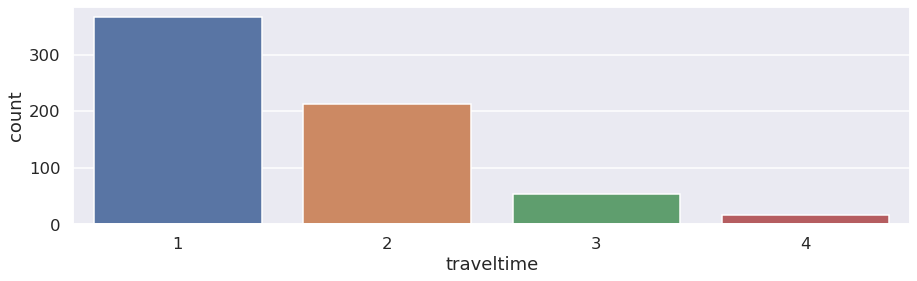

In [ ]:
sns.countplot(data=secondaryEval, x='traveltime')

It appears that traveltime is skewed right with most students spending less than 30 minutes commuting to school.

Lets view the distributions for all three grading periods side by side

<AxesSubplot:xlabel='G3', ylabel='Count'>

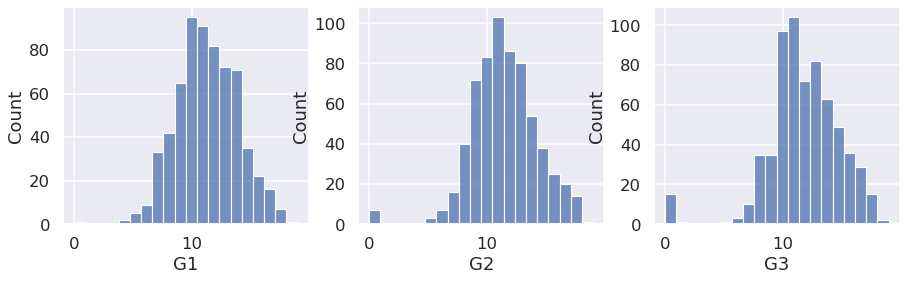

In [ ]:
fig, ax = plt.subplots(1,3)
sns.histplot(data=secondaryEval, x='G1', bins=20, ax=ax[0])
sns.histplot(data=secondaryEval, x='G2', bins=20, ax=ax[1])
sns.histplot(data=secondaryEval, x='G3', bins=20, ax=ax[2])

It appears that all three grading periods show roughly similar distributions that are approximately normal and centered around 11 or 12. One notable difference is that the number of "0" grades increases as the grading periods progress.

Lets examine this notable difference more closely.

In [ ]:
secondaryEval[(secondaryEval['G1'] == 0) | (secondaryEval['G2'] == 0) | (secondaryEval['G3'] == 0)].describe()

,traveltime,G1,G2,G3
count,16.000000,16.00000,16.00000,16.0000
mean,1.812500,6.62500,4.25000,0.6875
std,0.655108,2.47319,4.07431,2.7500
min,1.000000,0.00000,0.00000,0.0000
25%,1.000000,5.00000,0.00000,0.0000
50%,2.000000,7.00000,5.50000,0.0000
75%,2.000000,8.00000,7.25000,0.0000
max,3.000000,11.00000,11.00000,11.0000


Interesting, students who have had a "0" as a grade for any of their grading periods have a slightly higher average traveltime. However, this could be due to chance or other confounding variables, especially due to the small sample size of 16 compared to the overall of 649, so lets perform more thorough EDA.

In particular, lets generate scatterplots for each of the grading periods, comparing to see if there is a relationship with traveltime for any of them

<AxesSubplot:xlabel='traveltime', ylabel='G3'>

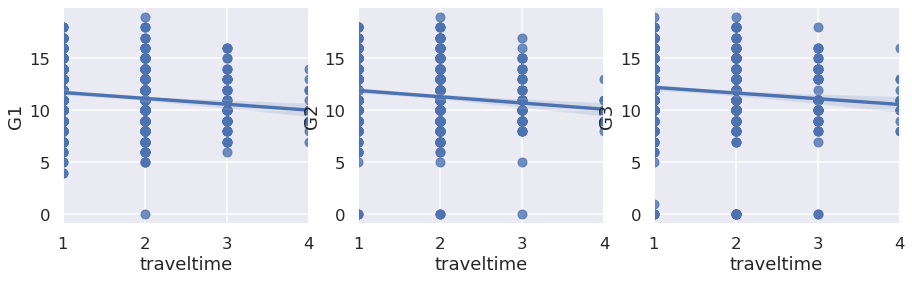

In [ ]:
fig, ax = plt.subplots(1,3)
sns.regplot(data=secondaryEval, fit_reg=True, x='traveltime', y='G1', ax=ax[0])
sns.regplot(data=secondaryEval, fit_reg=True, x='traveltime', y='G2', ax=ax[1])
sns.regplot(data=secondaryEval, fit_reg=True, x='traveltime', y='G3', ax=ax[2])

Nice! We see a clear downtrend in grades across all periods as the reported student commute increases. Lets generate a linear model to see if we can significantly predict grade using traveltime. Since we see similar trends across all grading periods, lets just focus on the final grading period, "G3", for this analysis. Let's use an alpha value of 0.01 to assess significance.

In [ ]:
outcome, predictors = patsy.dmatrices('G3 ~ traveltime', secondaryEval)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     10.64
Date:                Mon, 21 Nov 2022   Prob (F-statistic):            0.00117
Time:                        09:44:21   Log-Likelihood:                -1676.2
No. Observations:                 649   AIC:                             3356.
Df Residuals:                     647   BIC:                             3365.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.7668      0.292     43.658      0.0

We see a statistically significant negative correlation! Our p-value is 0.001, which is less than our alpha value of 0.01. We also have a negative coefficient of -0.5488, indicating that a higher traveltime predicts a lower final grade. 

Let's make sure our results aren't due to confounding variables. We'll examine some potential confounding variables including address (rural vs urban) and school (GP vs MS). We will use the original dataset with all columns secondaryEvalOrig for this analysis.

In [ ]:
pd.pivot_table(data=secondaryEvalOrig, values='G3', index=['address','traveltime']) 

G3
address traveltime           
R       1           11.269841
        2           11.123596
        3           10.828571
        4           10.500000
U       1           12.455446
        2           11.903226
        3           11.789474
        4           11.500000

It appears that address type (rural vs urban) is not a confounding variable, as the average final grade is continues to decrease across both address types as travel time increases. 

In [ ]:
pd.pivot_table(data=secondaryEvalOrig, values='G3', index=['school','traveltime']) 

G3
school traveltime           
GP     1           12.780919
       2           12.330275
       3           11.950000
       4           10.909091
MS     1           10.445783
       2           10.788462
       3           10.705882
       4           10.800000

Strange, here we see a very interesting difference between the two schools: for students attending school GP (Gabriel Pereira) we continue to see the original correlation found earlier, where average final grade decreases as travel time increases, but for students attending school MS (Mousinho da Silveira) we appear to see the opposite effect, where average final grade increases as travel time increases.  
  
We also see that students attending MS have a significantly lower average grade overall compared to students attending GP, likely due to differences in curriculum or class rigor, so we can't simply regenerate a multivariate regression using traveltime and school to predict grade.

Let's see scatterplots comparing traveltime and G3 separately for each of the schools to get a closer look at this difference. We'll set the GP school to remain blue while changing the color for the MS school to red as a distinction.

<AxesSubplot:xlabel='traveltime', ylabel='G3'>

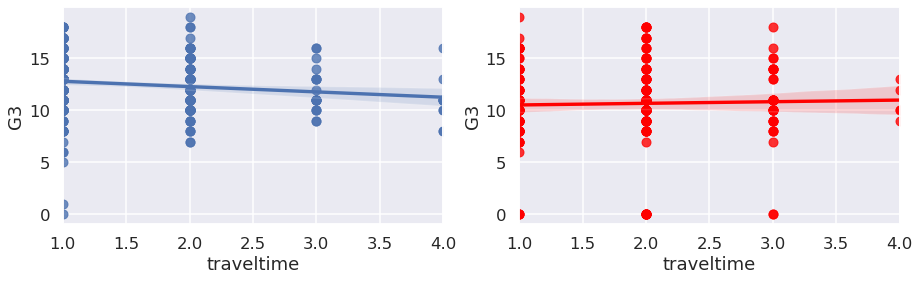

In [ ]:
fig, ax = plt.subplots(1,2)
sns.regplot(data=secondaryEvalOrig[secondaryEvalOrig['school'] == 'GP'], fit_reg=True, x='traveltime', y='G3', ax=ax[0], label='GP')
sns.regplot(data=secondaryEvalOrig[secondaryEvalOrig['school'] == 'MS'], fit_reg=True, x='traveltime', y='G3', ax=ax[1], label='MS', color='red')

We continue to see the negative correlation between traveltime and G3 grade that we saw earlier for GP, but MS appears to show no correlation between the two variables.

Let's generate more linear models to see if we can still significantly predict final grade using traveltime, this time separated by school. Let's continue to use an alpha value of 0.01 to assess significance.

First let's check school GP.

In [ ]:
outcome_gp, predictors_gp = patsy.dmatrices('G3 ~ traveltime', secondaryEvalOrig[secondaryEvalOrig['school'] == 'GP'])
mod_gp = sm.OLS(outcome_gp, predictors_gp)
res_gp = mod_gp.fit()
print(res_gp.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     8.050
Date:                Mon, 21 Nov 2022   Prob (F-statistic):            0.00477
Time:                        09:44:21   Log-Likelihood:                -1004.0
No. Observations:                 423   AIC:                             2012.
Df Residuals:                     421   BIC:                             2020.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.3065      0.287     46.418      0.0

We continue to see a statistically significant negative correlation for school GP, with a p-value is 0.005, which is less than our alpha value of 0.01. We also continue to have a negative coefficient, indicating that a higher traveltime predicts a lower final grade. 

Lets now check school MS.

In [ ]:
outcome, predictors = patsy.dmatrices('G3 ~ traveltime', secondaryEvalOrig[secondaryEvalOrig['school'] == 'MS'])
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.2159
Date:                Mon, 21 Nov 2022   Prob (F-statistic):              0.643
Time:                        09:44:21   Log-Likelihood:                -623.79
No. Observations:                 226   AIC:                             1252.
Df Residuals:                     224   BIC:                             1258.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3647      0.666     15.565      0.0

This time we do not see any significant correlation for school MS, with a p-value is 0.643, which is much higher than our alpha value of 0.01.

**Results**

While looking for confounding variables, we instead found that a student's commute to school (traveltime) negatively correlates to grade only in some schools, and shows no correlation in other schools. One possible explanation for this difference is that some schools may provide resources that accomodate for longer commute times, reducing the effect of commuting on the students' grades. Another possible explanation is that differences in coursework and curriculum of a school may impact the effect of commute times on students grades, either intensifying or lessening the effect. 

Ricardo

Now let's take a look at visualizations for the studentBehavior dataset:

We can first take an initial look at the distribution for the Travelling Time among the students who participated in this dataset. From this we can see a first look, and gauge how long, on average, it takes a student to commute to and from school.

 For this, we create a histogram of 'Travelling Time' from the dataset, with the y-axis telling us th count of students per time increment.

In [ ]:
fA, ax = plt.subplots(figsize =(20,10))
sns.histplot(data=studentBehavior, x='Travelling Time',
             bins=20)
            

As we can first see, there seems to be a right skew to the distribution of 'Travelling Time', with the three time increments containing the largest counts being '30-60mins','< 30mins', and '60-90mins'. This could later contribute the students in these groups giving more consise data contribution as far as a comparison from Travelling Time to College Mark (student grades).

We also see the increment with the least amount of correspondence is '150-180mins'. Furthormore, we may want to avoid drawing definite conclusions supporting our hypothesis bases on the performance on this group compared to others. It's also important to note that these times are not representative of specific transportation methods, and each increment may be varied by each method a student takes to get to campus.

The other variable to include our analyses academic performance. However, for there are mulitple factors that contribute to a healthy school perfomance, one being time allotted to school when not commuting to and from it. To understand how much time goes into school, and to see the grades of students compared the study time, we set a lineplot comparing "Daily Studying Time" and "College Mark".

Going even further, to see how possible individual academic performace baises based on stress and liking their degree, we can include "Stress Level" and "Do you like your degree?" to this visualization.

In [ ]:
fB, ax = plt.subplots(figsize =(20,10))
fB= sns.lineplot(x="Daily Studying Time", y="College Mark",
             hue="Stress Level", style = "Do you like your degree?", ci = None,
             data=studentBehavior)

At first, we see that the student that study less than perform in the 60 to 80 mark range. As the time that students spend studying increases, we can vaguely see a decrease in 'College Mark'. 

However, it's also worth noting which students perform the best and worst on average, thier stress level, how they like thier degree, and how mich time they'd say they spend studying daily: from the visualization, we see the the highest College Mark value comes from stuednts that have a 'Fabulous' stress level, like thier degree, and take 90-120mins studying on the daily. On the contrary, the worst performing come from students who have a 'Good' stress level, do not like their degree, and study 30-60mins daily. 

To take a better look at how 'Stress Level' and 'Daily Studying Time', and 'College Mark', let's make another visualzation, this time, without 'Do you like your degree?'. Let's omit "Do you like your degree?", as the trends from the previous graph stay relatively similar based on this factor, and to gain an early insight into whether 'Travelling Time' contributes to 'College Mark' we can also include 'Travelling Time' in our scatterplot:

In [ ]:
fC, ax = plt.subplots(figsize =(20,10))
fC= sns.scatterplot(x="College Mark", y="Daily Studying Time", size = "Travelling Time",
             hue = "Stress Level",palette="ch:r=-.2,d=.3_r", data=studentBehavior)

From the scaterplot, we can see a grouping of which students have the highest mark, and which factors may or may not contribute to such a result. Students that perform in the 80 to 100 mark range have a stress level of 'Good' and have a daily studying tiem of under 90 minutes, with a large group of those staying under 60 minutes. For students that earned a perfect 100 mark, this remained true; 'Good' Stress level, and under an hour (> 60mins) of study time daily. Moreover, we see that the travelling time of these students is in the 30-60min increment.

Now let's see the direct comparison of 'College Mark' & 'Travelling Time' using a boxplot to gain insight on averages per increment of time:

In [ ]:
fD, ax = plt.subplots(figsize =(20,10))
sns.boxplot(x="College Mark", y="Travelling Time",
            data=studentBehavior)
sns.despine(offset=10, trim=True)

Based on this boxplot, we see that per time increment of 'Travelling Time', the average for 'College Mark' stays relatively the same: in the 60-80 mark range. As noted earlier, the students who earned the highest mark have a travelling time of 30-60mins, and now <30min as well. 

Because of these results, its difficult to conlcude on agreing with the hypothesis. Again, each of the time increments displayed similar perfomance, and hence 'Travelling Time' may not be a direct factor to these specific students' college marks. 

Kayla

To evaluate the relationship between bus delay times and school session tardiness, we needed to breakdown the School Reported count. We can do so by using the `value_counts` method to summarize the total bus count reported by the school to arrive after the sesssion time in the dataset. The output is assigned to the variable `NYBus`.

In [ ]:
NYBus = NYBus.sort_values('Delay')

Once our bus delay count has been sorted, we can create data visualizations to display the number of buses that were reported to arrive after session time according to their delay time. We can create 2 bar charts to visualize this relationship. 

The chart below shows the number of buses that were not reported to arrive after school session began, arranged by the delay time.

In [ ]:
f2, ax = plt.subplots(figsize =(20, 8))
sns.histplot(data=NYBus['School Reported'] == False, x=NYBus['Delay'], kde = False)

We can also create a chart to display the number of buses that did arrive after school session began, arranged by the delay time.

In [ ]:
f3, ax = plt.subplots(figsize =(20, 8))
sns.histplot(x=NYBus[NYBus['School Reported']]['Delay'], kde=False)

Based on these two histograms created, we can observe that there isn't particularly a relationship between the bus delay time and whether or not the bus was recorded to disrupt the school session. The graph does initially show a trend between 0-45 minutes of having more reported tardinesses as the delay time increased, but this is not backed by the delay times greater than 45 minutes.

We can take a closer look at the relationship between bus delay times and school session tardiness by calculating the proportion of buses reported by the school to arrive after the session time, according to their delay time. To do so, we must create a separate dataset, `prop_df` which will include a separate column to calculate the proportion of buses. We can then use this new dataset to create a new bar chart.

In [ ]:
prop_NYBus = NYBus.groupby(['Delay'])['School Reported'].value_counts(normalize=True).rename('Proportion').reset_index()

f4, ax = plt.subplots(figsize =(20, 28))
sns.barplot(data=prop_NYBus, x='Delay', y='Proportion', hue='School Reported')

Due to the stark contrast in proportion between buses that were reported to arrive after session time and buses that were not reported, it can be difficult to evaluate the data visualization or even see the proportion of buses not reported. To better observe the data, we can try to create an interactive horizontal bar chart that can display each of the proportios out of the total count of buses.

In [ ]:
import plotly.express as px

f5 = px.bar(prop_NYBus, x='Proportion', y='Delay', hover_data=['Proportion', 'Delay'], 
             color='School Reported')
f5.update_layout(yaxis={'categoryorder':'total descending'}, plot_bgcolor = 'white')
f5.show()

There you have it! Based on this visualization, we can see that the majority of buses were not reported to arrive after session time, regardless of the bus delay time. If we are to take a look at the differences in delay time, there doesn't seem to be a strong correlation between the delay time and whether or not the bus was reported to arrive after the session time.

Therefore, while it can be hard to make an inference about the relationship between delay time and late bus arrival along with its impact to poorer quality of student education, one might be able to make the inference that most bus delays do not lead to school reports of bus arrival after school begins. However, there is a lack of concrete data to back this sentiment, as we are missing any information of what contributes to these school reports (i.e. when they are taken, how strictly bus attendances are maintained, whether or not the buses will be reported delayed if the bus arrives after the session time, etc.) Thus, this prevents us from making any strong conclusions in regards to the impact of the delay time.

Juna

Since we want to understand whether there is a correlation between the temporal length of a student's commute and their academic achievement, let's first take a look at whether there is a significant correlation between the type of transportation that the student utilizes compared to their cumulative GPA, as well as the student's accommodation type.

We will create 2 histograms to visualize this comparison between the two relationships.

Text(0.5, 0, 'Accommodation Type')

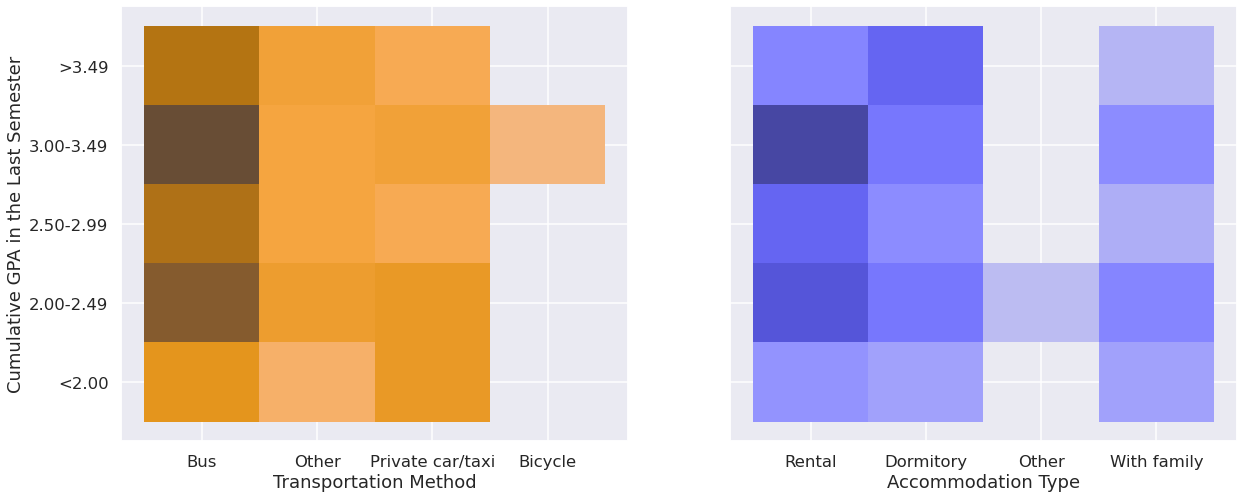

In [ ]:
f1, axes = plt.subplots(1, 2, figsize = (20, 8), sharey = True)

f1 = sns.histplot(x = 'TRANSPORT', y = 'CUML_GPA', data = universityEval, ax = axes[0], color = 'orange')
f2 = sns.histplot(x = 'LIVING', y = 'CUML_GPA', data = universityEval, ax = axes[1], color = 'blue')
plt.gca().invert_yaxis()

f1.set_ylabel('Cumulative GPA in the Last Semester')
f1.set_xlabel('Transportation Method')
f2.set_xlabel('Accommodation Type')

Based on the histograms, we observe that there is a high saturation of students who take the bus who achieved a cumulative GPA of 3.00-3.49 in the last semester. In a similar vein, many students who live in rented accommodations (e.g. apartments) also achieve a cumulative GPA between 3.00-3.49. Considering the average distance between off-campus apartments from universities, it is possible to assume that a high likelihood of students who live in rented accommodations take the bus to get to school.

Though not as highly saturated, a number of students who take the bus also achieve a cumulative GPA higher than 3.49. However, this does not necessarily correlate to the student living in a rented accommodation as previously observed for the 3.00-3.49 GPA range; there is a greater number of students who live in the dormitories who achieve a GPA greater than 3.49 than those who live in rented accommodations. 

Let's take a look at which transportation method and accommodation type are the most popular.

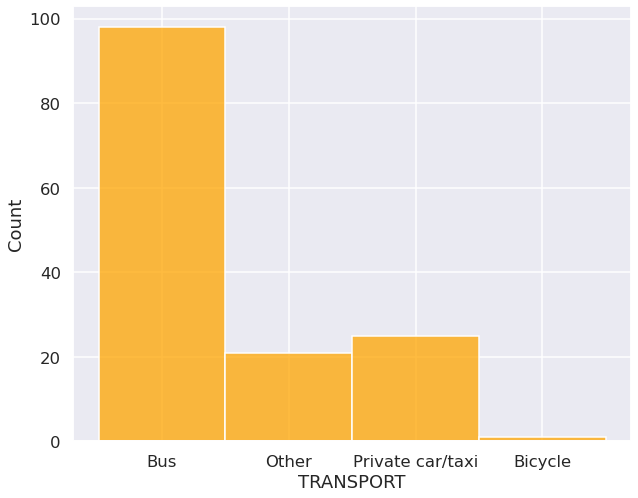

In [ ]:
f1, ax = plt.subplots(figsize = (10, 8))
f1 = sns.histplot(x = 'TRANSPORT', data = universityEval, color = 'orange')

Here, we can see that bussing is the most popular form of transportation among the students in the universityEval dataset, followed by private car/taxi, then other transportation methods, and finally, biking. 

In [ ]:
universityEval['LIVING'].value_counts()

Rental         68
Dormitory      49
With family    27
Other           1
Name: LIVING, dtype: int64

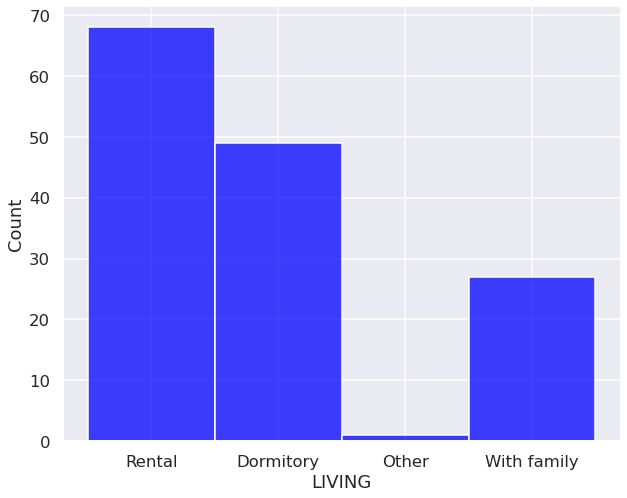

In [ ]:
f1, ax = plt.subplots(figsize = (10, 8))
f1 = sns.histplot(x = 'LIVING', data = universityEval, color = 'blue')

Rentals are the most popular accommodation type, followed by dormitories, living with family, and other accommodation types.

Next, we want to see whether there exists a strong correlation between transportation type and cumulative GPA, as well as between accommodation type and GPA. We will do so by plotting the data in a scatterplot. 

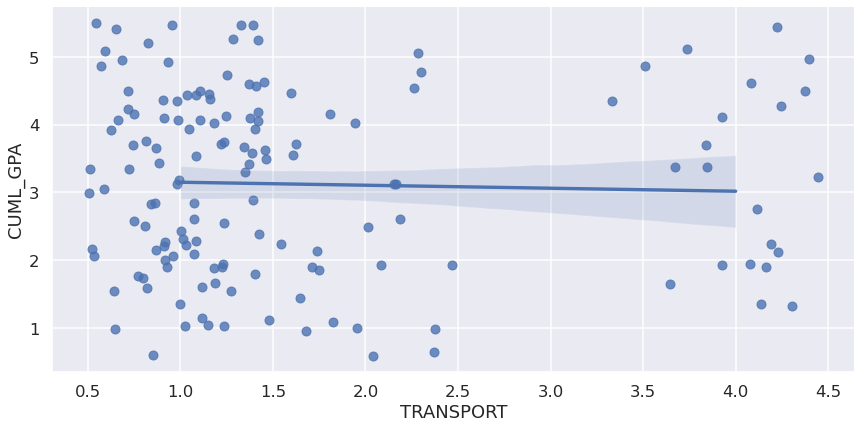

In [ ]:
f1 = sns.lmplot(x='TRANSPORT', y='CUML_GPA', data=origuniversityEval,
           fit_reg=True, height=6, aspect=2, 
           x_jitter=.5, y_jitter=.5);

It seems like there is no particular correlation between the method of transportation and the cumulative GPA from the last semester. Since this high level overview of the two variables did not provide us with a particular comparison, we will take a look at the each of the average cumulative GPAs of students who utilize each type of transportation method. 

In [ ]:
# Assign variables that contain the cumulative GPA data of students in each category of transportation
GPA_bus = origuniversityEval[origuniversityEval['TRANSPORT'] == 1]['CUML_GPA']
GPA_car = origuniversityEval[origuniversityEval['TRANSPORT'] == 2]['CUML_GPA']
GPA_bike = origuniversityEval[origuniversityEval['TRANSPORT'] == 3]['CUML_GPA']
GPA_other = origuniversityEval[origuniversityEval['TRANSPORT'] == 4]['CUML_GPA']

# Take the average of each set of data of students' GPA depending on their method of transportation 
avg_GPA_bus = GPA_bus.mean()
avg_GPA_car = GPA_car.mean()
avg_GPA_bike = GPA_bike.mean()
avg_GPA_other = GPA_other.mean()

print('The average GPA for students who bus to school is \t {:2.2f}'.format(avg_GPA_bus))
print('The average GPA for students who drive to school is \t {:2.2f}'.format(avg_GPA_car))
print('The average GPA for students who bike to school is \t {:2.2f}'.format(avg_GPA_bike))
print('The average GPA for students who take other methods of transportation to school is \t {:2.2f}'.format(avg_GPA_other))

The average GPA for students who bus to school is 	 3.23
The average GPA for students who drive to school is 	 2.60
The average GPA for students who bike to school is 	 4.00
The average GPA for students who take other methods of transportation to school is 	 3.19


From this analysis, we can see that students who bike to school have the highest GPA, while those who drive to school have the lowest average GPA. However, based on our data visualization earlier, we know that there is only 1 student who bikes to school from the universityEval dataset, which does not create an equitable comparison of GPA compared to the 25 recorded students who drive to school using a private car or taxi.

We will also take a look at the average cumulative GPA amongst the different accommodation types.

In [ ]:
# Assign variables that contain the cumulative GPA data of students in each category of living
GPA_rent = origuniversityEval[origuniversityEval['LIVING'] == 1]['CUML_GPA']
GPA_dorm = origuniversityEval[origuniversityEval['LIVING'] == 2]['CUML_GPA']
GPA_family = origuniversityEval[origuniversityEval['LIVING'] == 3]['CUML_GPA']
GPA_otherliving = origuniversityEval[origuniversityEval['LIVING'] == 4]['CUML_GPA']

# Take the average of each set of data of students' GPA depending on their method of living 
avg_GPA_rent = GPA_rent.mean()
avg_GPA_dorm = GPA_dorm.mean()
avg_GPA_family = GPA_family.mean()
avg_GPA_otherliving = GPA_otherliving.mean()

print('The average GPA for students who live in rented accommodations is \t {:2.2f}'.format(avg_GPA_rent))
print('The average GPA for students who live in dormitories is \t {:2.2f}'.format(avg_GPA_dorm))
print('The average GPA for students who live with family is \t {:2.2f}'.format(avg_GPA_family))
print('The average GPA for students who live in other accommodations is \t {:2.2f}'.format(avg_GPA_otherliving))

The average GPA for students who live in rented accommodations is 	 3.12
The average GPA for students who live in dormitories is 	 3.37
The average GPA for students who live with family is 	 2.74
The average GPA for students who live in other accommodations is 	 2.00


According to these averages, students who live in the dormitories are reported as having the highest cumulative GPAs in the last semester, while those in other accommodations have the lowest. However, it is also important to note that, like the transportation data, there is only 1 student in the dataset who reported as living in "Other" living accommodations, which creates an inequitable comparison. 

Based on these observations, one might infer that since there will most likely be a greater distance between campus and those who live in rented accommodations or live with family compared to those who live in dormitories, academic achievement in the form of cumulative GPA is affected by commuting distance. However, without the concrete data to back up this statement, we cannot confidently conclude the negative correlation between an increase in commuting distance with academic achievement. 

Our lack of data in this particular dataset also prevents us from making strong inferences, especially considering that several of the categories only consist of a single student response (e.g. there is only 1 student who bikes to campus, there is only 1 student who lives in "Other" living accommodations), which results in outliers that may skew our data.